# Analyse der HANA - SSBM Benchmark Log Dateien

## Einstellungen

Bitte passen sie die Einstellungen bei Bedarf an.

In [1]:
from util import Analyser
import pdb
import re
LOG_PATH_ROOT="./"
analyser_col = Analyser(LOG_PATH_ROOT + "col.log")
analyser_row = Analyser(LOG_PATH_ROOT + "row.log")

## Allgemein:
Im folgenden wird die allgemeine Laufzeit des Benchmarks analysiert
mit folgenden Testspezifikationen

Wiederholungen:

In [2]:
print(analyser_col.get_repetitions())
#print(analyser_row.get_repetitions())

10


CPU: Intel(R) Core(TM) i7-6820HQ CPU @ 2.70GHz

CPU Kerne: 4 (x2 Theads)

RAM: 8GB

### Zeilenbasiert
Im folgenden wird die allgemeine Laufzeit des Benchmarks
bei einem zeilenbasierten Schmata betrachtet.

In [3]:
benchmark_row = analyser_row.get_row_benchmark()
benchmark_row.print_stats()

||Time in msec|
|--|--|
|Samples|10|
|Average|110307|
|Min|109596|
|Max|111220|
|Median|110301|
|Standard Deviation|493|
|Total|1103068|

Table: General Data - Row Benchmark


In [4]:
re.search("^\\.?[^.]*\\.[^.]*\\.[^.]*$", "./sql/benchmark/q1_bench/q1.1-10.sql")

<_sre.SRE_Match object; span=(0, 36), match='./sql/benchmark/q1_bench/q1.1-10.sql'>

In [5]:
re.search("/([^\/]+)\\.sql", "./sql/benchmark/q1_bench/q1")

## Spaltenbasiert
Im folgenden wird die allgemeine Laufzeit des Benchmarks bei einem
spaltenbasierten Schemata betrachtet

In [6]:
benchmark_col = analyser_col.get_column_benchmark()
benchmark_col.print_stats()

||Time in msec|
|--|--|
|Samples|10|
|Average|4654|
|Min|4480|
|Max|5701|
|Median|4499|
|Standard Deviation|368|
|Total|46545|

Table: General Data - Column Benchmark


### Vergleich Zeilenbasiert vs. Spaltenbasiert

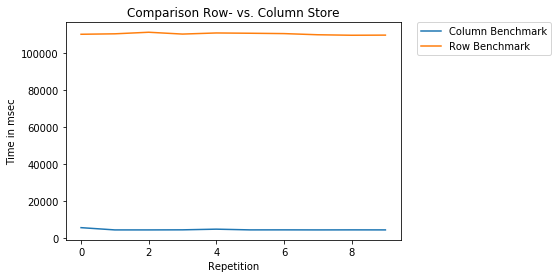

In [7]:
from util import Comparison
import re

column_benchmark = analyser_col.get_column_benchmark()
row_benchmark = analyser_row.get_row_benchmark()
comparison = Comparison(column_benchmark, row_benchmark)

comparison.set_title("Comparison Row- vs. Column Store")
comparison.compare_visually()

In [8]:
comparison.set_title("Comparison Row- vs. Column Store in usec")
comparison.compare_raw()

||Column Benchmark|Row Benchmark|
|--|--|--|
|Max|5701|111220|
|Min|4480|109596|
|Total|46545|1103068|
|Median|4499|110301|
|Standard Deviation|368|493|
|Samples|10|10|
|Average|4654|110307|

Table: Comparison Row- vs. Column Store in usec


In [9]:
comparison.compare()

||Column Benchmark|Row Benchmark|
|--|--|--|
|Max|0.0|1.0|
|Min|0.0|1.0|
|Total|0.0|1.0|
|Median|0.0|1.0|
|Standard Deviation|0.0|1.0|
|Samples|10|10|
|Average|0.0|1.0|

Table: Comparison Row- vs. Column Store in usec


In [10]:
comparison.set_title("Comparison Row- vs. Column Store in msec")
comparison.compare(lambda x: x / 1000)

||Column Benchmark|Row Benchmark|
|--|--|--|
|Max|5.701|111.22|
|Min|4.48|109.596|
|Total|46.545|1103.068|
|Median|4.499|110.301|
|Standard Deviation|0.368|0.493|
|Samples|10|10|
|Average|4.654|110.307|

Table: Comparison Row- vs. Column Store in msec


## Vergleich Row Column

No handles with labels found to put in legend.


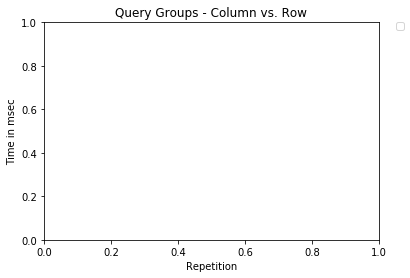

In [28]:
column_benchmark.set_prefix("column")
row_benchmark.set_prefix("row")
query_stats = column_benchmark.get_query_stats(lambda x: not re.search("\\.", x))
query_stats += row_benchmark.get_query_stats(lambda x: not re.search("\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Query Groups - Column vs. Row")
comparison.compare_visually()

In [29]:
comparison.set_title("Query Groups - Column vs. Row in msec")
comparison.compare(lambda x: round(x / 1000, 1))

||
|--|

Table: Query Groups - Column vs. Row in msec


In [17]:
comparison.set_title("Normalized Query Groups - Column vs. Row")
comparison.compare()

||
|--|

Table: Normalized Query Groups - Column vs. Row


In [18]:
row_benchmark = analyser_row.get_row_benchmark()

query_stats = row_benchmark.get_query_stats(lambda x: not re.search("\\.", x))
comparison = Comparison(row_benchmark,*query_stats)
comparison.compare_raw()

||Row Benchmark|
|--|--|
|Total|1103068|
|Max|111220|
|Samples|10|
|Standard Deviation|493|
|Min|109596|
|Average|110307|
|Median|110301|


In [30]:
column_benchmark = analyser_col.get_column_benchmark()
row_benchmark = analyser_row.get_row_benchmark()

row_query_stats = row_benchmark.get_query_stats(lambda x: not re.search("\\.", x))
row_comparison = Comparison(*row_query_stats, name="Row Store")
column_query_stats = column_benchmark.get_query_stats(lambda x: not re.search("\\.", x))
column_comparison = Comparison(*column_query_stats, name="Column Store")

row_comparison.set_title("Queries - Row vs. Column in msec")
row_comparison.compare_with(column_comparison, "Average")

Exception: Wrong queries

In [31]:
column_benchmark = analyser_col.get_column_benchmark()
row_benchmark = analyser_row.get_row_benchmark()

row_query_stats = row_benchmark.get_query_stats(lambda x: re.search("\\.", x))
row_comparison = Comparison(*row_query_stats, name="Row Store")
column_query_stats = column_benchmark.get_query_stats(lambda x: re.search("\\.", x))
column_comparison = Comparison(*column_query_stats, name="Column Store")

row_comparison.set_title("Queries - Row vs. Column in msec")
row_comparison.compare_with(column_comparison, "Average",
                            f=lambda x: round(x / 1000, 2),
                            ignore=lambda x: x == "in %")

|| q1.1-10| q1.2-10| q1.3-10| q2.1-10| q2.2-10| q2.3-10| q3.1-10| q3.2-10| q3.3-10| q3.4-10| q4.1-10| q4.2-10| q4.3-10|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Row Store|15.05|6.33|6.32|7.86|7.25|7.0|12.44|7.2|5.95|5.78|11.77|9.46|7.91|
|Column Store|0.6|0.07|0.13|0.38|0.24|0.14|0.74|0.37|0.16|0.16|0.68|0.61|0.37|
|Difference|14.45|6.26|6.19|7.48|7.01|6.86|11.7|6.82|5.79|5.62|11.09|8.85|7.54|
|in %|96.0|98.8|98.0|95.2|96.7|98.0|94.1|94.8|97.3|97.2|94.2|93.6|95.3|

Table: Queries - Row vs. Column in msec


### Stabilität des Benchmarks

#### Spaltenbasiert

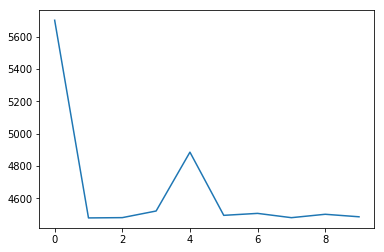

In [32]:
from matplotlib import pyplot as plt, mlab

benchmark = analyser_col.get_column_benchmark()
plt.plot(benchmark.get_times())
plt.show()

#### Zeilenbasiert

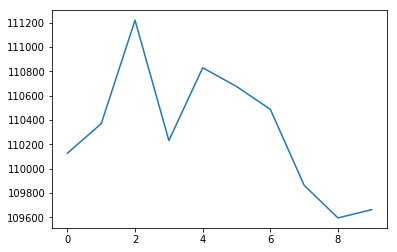

In [33]:
benchmark = analyser_row.get_row_benchmark()
plt.plot(benchmark.get_times())
plt.show()

## Betrachtung einzelner Queries
Im folgenden werden die einzelnen Queries des SSBM Benchmarks betrachtet.

### Spaltenbasiert

No handles with labels found to put in legend.


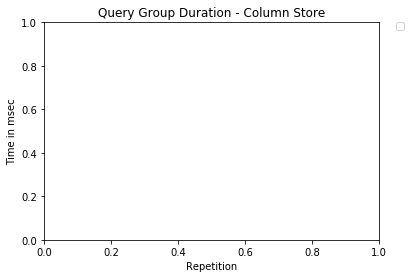

In [34]:
from util import display_table
import re

benchmark = analyser_col.get_column_benchmark()

query_stats = benchmark.get_query_stats(lambda x: not re.search("\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Query Group Duration - Column Store")
comparison.compare_visually()

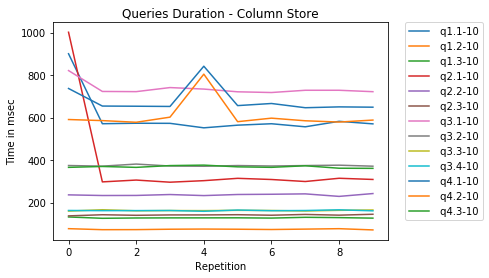

In [35]:
query_stats = benchmark.get_query_stats()
comparison = Comparison(*query_stats)
comparison.set_title("Queries Duration - Column Store")
comparison.compare_visually()

In [36]:
comparison.set_title("Queries Duration in usec - Column Store")
comparison.compare_raw()

|| q1.1-10| q1.2-10| q1.3-10| q2.1-10| q2.2-10| q2.3-10| q3.1-10| q3.2-10| q3.3-10| q3.4-10| q4.1-10| q4.2-10| q4.3-10|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Total|6017|748|1288|3752|2367|1421|7362|3741|1631|1629|6809|6094|3685|
|Max|901|78|133|1002|243|145|821|382|167|166|842|805|377|
|Samples|10|10|10|10|10|10|10|10|10|10|10|10|10|
|Standard Deviation|100|2|2|209|4|2|29|3|2|2|59|65|5|
|Min|552|72|126|296|229|138|718|371|160|159|647|578|361|
|Average|602|75|129|375|237|142|736|374|163|163|681|609|368|
|Median|571|75|128|308|237|142|726|373|163|163|654|587|367|

Table: Queries Duration in usec - Column Store


In [37]:
comparison.set_title("Normalized Queries Duration - Column Store")
comparison.compare()

|| q1.1-10| q1.2-10| q1.3-10| q2.1-10| q2.2-10| q2.3-10| q3.1-10| q3.2-10| q3.3-10| q3.4-10| q4.1-10| q4.2-10| q4.3-10|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Total|0.8|0.0|0.08|0.45|0.24|0.1|1.0|0.45|0.13|0.13|0.92|0.81|0.44|
|Max|0.89|0.0|0.06|1.0|0.18|0.07|0.8|0.33|0.1|0.1|0.83|0.79|0.32|
|Samples|10|10|10|10|10|10|10|10|10|10|10|10|10|
|Standard Deviation|0.47|0.0|0.0|1.0|0.01|0.0|0.13|0.0|0.0|0.0|0.28|0.3|0.01|
|Min|0.74|0.0|0.08|0.35|0.24|0.1|1.0|0.46|0.14|0.13|0.89|0.78|0.45|
|Average|0.8|0.0|0.08|0.45|0.25|0.1|1.0|0.45|0.13|0.13|0.92|0.81|0.44|
|Median|0.76|0.0|0.08|0.36|0.25|0.1|1.0|0.46|0.14|0.14|0.89|0.79|0.45|

Table: Normalized Queries Duration - Column Store


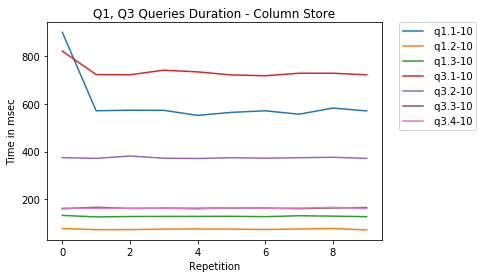

In [38]:
query_stats = benchmark.get_query_stats(lambda x: re.search("[13]\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q1, Q3 Queries Duration - Column Store")
comparison.compare_visually()

In [39]:
comparison.set_title("Q1, Q3 Queries Duration in usec - Column Store")
comparison.compare_raw()

|| q1.1-10| q1.2-10| q1.3-10| q3.1-10| q3.2-10| q3.3-10| q3.4-10|
|--|--|--|--|--|--|--|--|
|Total|6017|748|1288|7362|3741|1631|1629|
|Max|901|78|133|821|382|167|166|
|Samples|10|10|10|10|10|10|10|
|Standard Deviation|100|2|2|29|3|2|2|
|Min|552|72|126|718|371|160|159|
|Average|602|75|129|736|374|163|163|
|Median|571|75|128|726|373|163|163|

Table: Q1, Q3 Queries Duration in usec - Column Store


In [40]:
comparison.set_title("Normalized Q1, Q3 Queries Duration - Column Store")
comparison.compare()

|| q1.1-10| q1.2-10| q1.3-10| q3.1-10| q3.2-10| q3.3-10| q3.4-10|
|--|--|--|--|--|--|--|--|
|Total|0.8|0.0|0.08|1.0|0.45|0.13|0.13|
|Max|1.0|0.0|0.07|0.9|0.37|0.11|0.11|
|Samples|10|10|10|10|10|10|10|
|Standard Deviation|1.0|0.0|0.0|0.28|0.01|0.0|0.0|
|Min|0.74|0.0|0.08|1.0|0.46|0.14|0.13|
|Average|0.8|0.0|0.08|1.0|0.45|0.13|0.13|
|Median|0.76|0.0|0.08|1.0|0.46|0.14|0.14|

Table: Normalized Q1, Q3 Queries Duration - Column Store


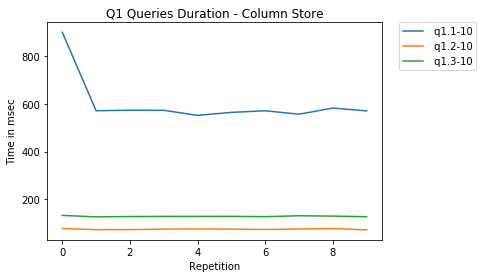

In [41]:
query_stats = benchmark.get_query_stats(lambda x: re.search("1\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q1 Queries Duration - Column Store")
comparison.compare_visually()

In [42]:
comparison.set_title("Q1 Queries Duration in usec - Column Store")
comparison.compare_raw()

|| q1.1-10| q1.2-10| q1.3-10|
|--|--|--|--|
|Total|6017|748|1288|
|Max|901|78|133|
|Samples|10|10|10|
|Standard Deviation|100|2|2|
|Min|552|72|126|
|Average|602|75|129|
|Median|571|75|128|

Table: Q1 Queries Duration in usec - Column Store


In [43]:
comparison.set_title("Normalized Q1 Queries Duration - Column Store")
comparison.compare()

|| q1.1-10| q1.2-10| q1.3-10|
|--|--|--|--|
|Total|1.0|0.0|0.1|
|Max|1.0|0.0|0.07|
|Samples|10|10|10|
|Standard Deviation|1.0|0.0|0.0|
|Min|1.0|0.0|0.11|
|Average|1.0|0.0|0.1|
|Median|1.0|0.0|0.11|

Table: Normalized Q1 Queries Duration - Column Store


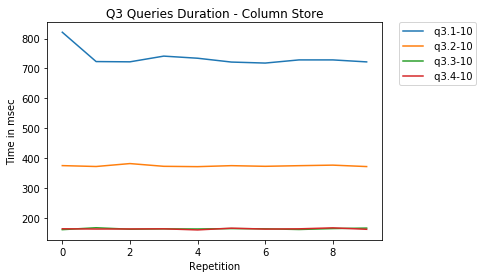

In [44]:
query_stats = benchmark.get_query_stats(lambda x: re.search("3\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q3 Queries Duration - Column Store")
comparison.compare_visually()

In [45]:
comparison.set_title("Q3 Queries Duration in usec - Column Store")
comparison.compare_raw()

|| q3.1-10| q3.2-10| q3.3-10| q3.4-10|
|--|--|--|--|--|
|Total|7362|3741|1631|1629|
|Max|821|382|167|166|
|Samples|10|10|10|10|
|Standard Deviation|29|3|2|2|
|Min|718|371|160|159|
|Average|736|374|163|163|
|Median|726|373|163|163|

Table: Q3 Queries Duration in usec - Column Store


In [46]:
comparison.set_title("Normalized Q3 Queries Duration - Column Store")
comparison.compare()

|| q3.1-10| q3.2-10| q3.3-10| q3.4-10|
|--|--|--|--|--|
|Total|1.0|0.37|0.0|0.0|
|Max|1.0|0.33|0.0|0.0|
|Samples|10|10|10|10|
|Standard Deviation|1.0|0.04|0.0|0.0|
|Min|1.0|0.38|0.0|0.0|
|Average|1.0|0.37|0.0|0.0|
|Median|1.0|0.37|0.0|0.0|

Table: Normalized Q3 Queries Duration - Column Store


## Zeilenbasiert

No handles with labels found to put in legend.


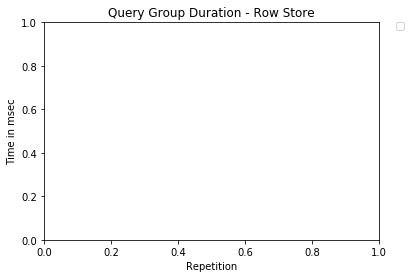

In [47]:
benchmark = analyser_row.get_row_benchmark()
query_stats = benchmark.get_query_stats(lambda x: not re.search("\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Query Group Duration - Row Store")
comparison.compare_visually()

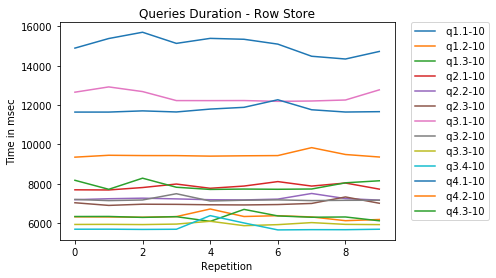

In [48]:
query_stats = benchmark.get_query_stats()
comparison = Comparison(*query_stats)
comparison.set_title("Queries Duration - Row Store")
comparison.compare_visually()

In [49]:
comparison.set_title("Queries Duration in usec - Row Store")
comparison.compare_raw()

|| q1.1-10| q1.2-10| q1.3-10| q2.1-10| q2.2-10| q2.3-10| q3.1-10| q3.2-10| q3.3-10| q3.4-10| q4.1-10| q4.2-10| q4.3-10|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Total|150477|63327|63183|78589|72445|69995|124364|71960|59529|57824|117659|94608|79104|
|Max|15700|6718|6698|8111|7507|7330|12922|7495|6095|6382|12269|9836|8284|
|Samples|10|10|10|10|10|10|10|10|10|10|10|10|10|
|Standard Deviation|412|148|155|141|93|117|271|102|60|223|184|131|217|
|Min|14340|6124|6091|7686|7169|6901|12188|7124|5871|5656|11643|9352|7713|
|Average|15048|6333|6318|7859|7245|7000|12436|7196|5953|5782|11766|9461|7910|
|Median|15115|6319|6321|7846|7226|6958|12243|7164|5935|5690|11684|9432|7779|

Table: Queries Duration in usec - Row Store


In [50]:
comparison.set_title("Normalized Queries Duration - Row Store")
comparison.compare()

|| q1.1-10| q1.2-10| q1.3-10| q2.1-10| q2.2-10| q2.3-10| q3.1-10| q3.2-10| q3.3-10| q3.4-10| q4.1-10| q4.2-10| q4.3-10|
|--|--|--|--|--|--|--|--|--|--|--|--|--|--|
|Total|1.0|0.06|0.06|0.22|0.16|0.13|0.72|0.15|0.02|0.0|0.65|0.4|0.23|
|Max|1.0|0.06|0.06|0.21|0.15|0.13|0.71|0.15|0.0|0.03|0.64|0.39|0.23|
|Samples|10|10|10|10|10|10|10|10|10|10|10|10|10|
|Standard Deviation|1.0|0.25|0.27|0.23|0.09|0.16|0.6|0.12|0.0|0.46|0.35|0.2|0.45|
|Min|1.0|0.05|0.05|0.23|0.17|0.14|0.75|0.17|0.02|0.0|0.69|0.43|0.24|
|Average|1.0|0.06|0.06|0.22|0.16|0.13|0.72|0.15|0.02|0.0|0.65|0.4|0.23|
|Median|1.0|0.07|0.07|0.23|0.16|0.13|0.7|0.16|0.03|0.0|0.64|0.4|0.22|

Table: Normalized Queries Duration - Row Store


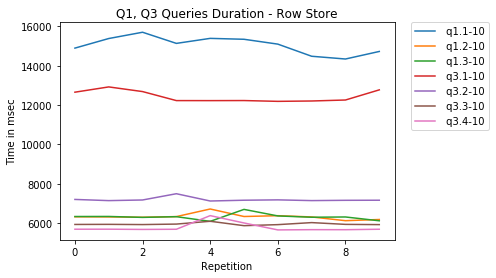

In [51]:
query_stats = benchmark.get_query_stats(lambda x: re.search("[13]\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q1, Q3 Queries Duration - Row Store")
comparison.compare_visually()

In [52]:
comparison.set_title("Q1, Q3 Queries Duration in usec - Row Store")
comparison.compare_raw()

|| q1.1-10| q1.2-10| q1.3-10| q3.1-10| q3.2-10| q3.3-10| q3.4-10|
|--|--|--|--|--|--|--|--|
|Total|150477|63327|63183|124364|71960|59529|57824|
|Max|15700|6718|6698|12922|7495|6095|6382|
|Samples|10|10|10|10|10|10|10|
|Standard Deviation|412|148|155|271|102|60|223|
|Min|14340|6124|6091|12188|7124|5871|5656|
|Average|15048|6333|6318|12436|7196|5953|5782|
|Median|15115|6319|6321|12243|7164|5935|5690|

Table: Q1, Q3 Queries Duration in usec - Row Store


In [53]:
comparison.set_title("Normalized Q1, Q3 Queries Duration - Row Store")
comparison.compare()

|| q1.1-10| q1.2-10| q1.3-10| q3.1-10| q3.2-10| q3.3-10| q3.4-10|
|--|--|--|--|--|--|--|--|
|Total|1.0|0.06|0.06|0.72|0.15|0.02|0.0|
|Max|1.0|0.06|0.06|0.71|0.15|0.0|0.03|
|Samples|10|10|10|10|10|10|10|
|Standard Deviation|1.0|0.25|0.27|0.6|0.12|0.0|0.46|
|Min|1.0|0.05|0.05|0.75|0.17|0.02|0.0|
|Average|1.0|0.06|0.06|0.72|0.15|0.02|0.0|
|Median|1.0|0.07|0.07|0.7|0.16|0.03|0.0|

Table: Normalized Q1, Q3 Queries Duration - Row Store


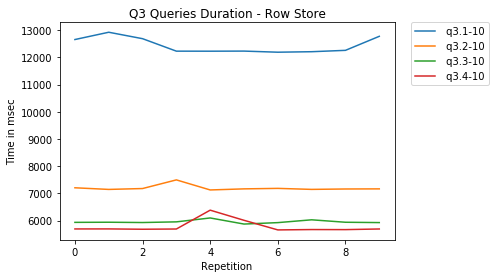

In [54]:
query_stats = benchmark.get_query_stats(lambda x: re.search("3\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q3 Queries Duration - Row Store")
comparison.compare_visually()

In [55]:
comparison.set_title("Q3 Queries Duration in usec - Row Store")
comparison.compare_raw()

|| q3.1-10| q3.2-10| q3.3-10| q3.4-10|
|--|--|--|--|--|
|Total|124364|71960|59529|57824|
|Max|12922|7495|6095|6382|
|Samples|10|10|10|10|
|Standard Deviation|271|102|60|223|
|Min|12188|7124|5871|5656|
|Average|12436|7196|5953|5782|
|Median|12243|7164|5935|5690|

Table: Q3 Queries Duration in usec - Row Store


In [56]:
comparison.set_title("Normalized Q3 Queries Duration - Column Store")
comparison.compare()

|| q3.1-10| q3.2-10| q3.3-10| q3.4-10|
|--|--|--|--|--|
|Total|1.0|0.21|0.03|0.0|
|Max|1.0|0.21|0.0|0.04|
|Samples|10|10|10|10|
|Standard Deviation|1.0|0.2|0.0|0.77|
|Min|1.0|0.22|0.03|0.0|
|Average|1.0|0.21|0.03|0.0|
|Median|1.0|0.22|0.04|0.0|

Table: Normalized Q3 Queries Duration - Column Store


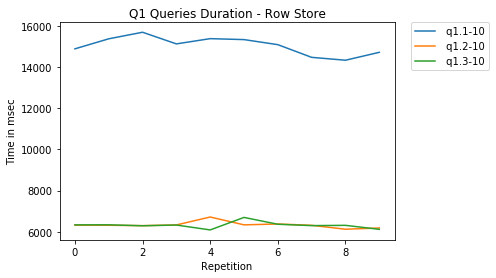

In [57]:
query_stats = benchmark.get_query_stats(lambda x: re.search("1\\.", x))
comparison = Comparison(*query_stats)
comparison.set_title("Q1 Queries Duration - Row Store")
comparison.compare_visually()

In [58]:
comparison.set_title("Q1 Queries Duration in usec - Row Store")
comparison.compare_raw()

|| q1.1-10| q1.2-10| q1.3-10|
|--|--|--|--|
|Total|150477|63327|63183|
|Max|15700|6718|6698|
|Samples|10|10|10|
|Standard Deviation|412|148|155|
|Min|14340|6124|6091|
|Average|15048|6333|6318|
|Median|15115|6319|6321|

Table: Q1 Queries Duration in usec - Row Store


In [59]:
comparison.set_title("Normalized Q1 Queries Duration - Column Store")
comparison.compare()

|| q1.1-10| q1.2-10| q1.3-10|
|--|--|--|--|
|Total|1.0|0.0|0.0|
|Max|1.0|0.0|0.0|
|Samples|10|10|10|
|Standard Deviation|1.0|0.0|0.03|
|Min|1.0|0.0|0.0|
|Average|1.0|0.0|0.0|
|Median|1.0|0.0|0.0|

Table: Normalized Q1 Queries Duration - Column Store


## Indizes

### Vergleich von allen Messwerten

In [60]:
column_benchmark = analyser_col.get_column_benchmark()
index_column_benchmark = analyser_col.get_column_benchmark_I()
row_benchmark = analyser_row.get_row_benchmark()
index_row_benchmark = analyser_row.get_row_benchmark_I()
comparison = Comparison(column_benchmark, index_column_benchmark, row_benchmark, index_row_benchmark)

comparison.compare_raw()

||Column Benchmark|Column Benchmark with Index|Row Benchmark|Row Benchmark with Index|
|--|--|--|--|--|
|Total|46545|39687|1103068|196884|
|Max|5701|5039|111220|19863|
|Samples|10|10|10|10|
|Standard Deviation|368|368|493|67|
|Min|4480|3792|109596|19626|
|Average|4654|3969|110307|19688|
|Median|4499|3820|110301|19665|


In [61]:
comparison.compare()

||Column Benchmark|Column Benchmark with Index|Row Benchmark|Row Benchmark with Index|
|--|--|--|--|--|
|Total|0.01|0.0|1.0|0.15|
|Max|0.01|0.0|1.0|0.14|
|Samples|10|10|10|10|
|Standard Deviation|0.71|0.71|1.0|0.0|
|Min|0.01|0.0|1.0|0.15|
|Average|0.01|0.0|1.0|0.15|
|Median|0.01|0.0|1.0|0.15|


### Spaltenbasiert

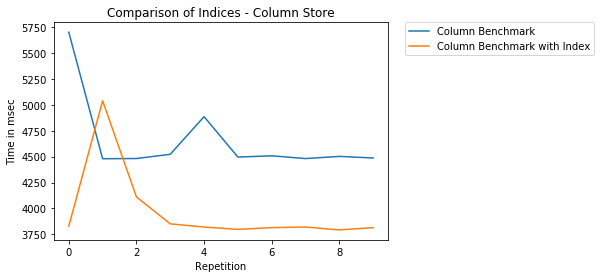

In [62]:
column_benchmark = analyser_col.get_column_benchmark()
index_column_benchmark = analyser_col.get_column_benchmark_I()
comparison = Comparison(column_benchmark, index_column_benchmark)

comparison.set_title("Comparison of Indices - Column Store")
comparison.compare_visually()

In [63]:
comparison.set_title("Comparison of Indices in usec - Column Store")
comparison.compare_raw()

||Column Benchmark|Column Benchmark with Index|
|--|--|--|
|Total|46545|39687|
|Max|5701|5039|
|Samples|10|10|
|Standard Deviation|368|368|
|Min|4480|3792|
|Average|4654|3969|
|Median|4499|3820|

Table: Comparison of Indices in usec - Column Store


In [64]:
from util import Analyser
LOG_PATH_ROOT="./"
analyser2 = Analyser(LOG_PATH_ROOT + "logOlap.log")

column_benchmark = analyser2.get_column_benchmark()
index_column_benchmark = analyser2.get_column_benchmark_I()
column_benchmark_o = analyser2.get_column_benchmark_olap()
index_column_benchmark_o = analyser2.get_column_benchmark_I_olap()

query_stats_no = column_benchmark.get_query_stats(lambda x: re.search("1\\.2", x))
query_stats = index_column_benchmark.get_query_stats(lambda x: re.search("1\\.2", x))
query_stats_no_olap = column_benchmark_o.get_query_stats(lambda x: re.search("1\\.2", x))
query_stats_olap = index_column_benchmark_o.get_query_stats(lambda x: re.search("1\\.2", x))
comparison = Comparison(*query_stats_no)
comparison.set_title("No index, no OLAP")
comparison.compare_raw()

comparison2 = Comparison(*query_stats)
comparison2.set_title("Index, no OLAP")
comparison2.compare_raw()

comparison3 = Comparison(*query_stats_no_olap)
comparison3.set_title("No index, OLAP")
comparison3.compare_raw()

comparison4 = Comparison(*query_stats_olap)
comparison4.set_title("Index, OLAP")
comparison4.compare_raw()



FileNotFoundError: [Errno 2] No such file or directory: './logOlap.log'

In [65]:
comparison = Comparison(index_column_benchmark,column_benchmark, column_benchmark_o, index_column_benchmark_o)
comparison.compare_raw()

NameError: name 'column_benchmark_o' is not defined

### Zeilenbasiert

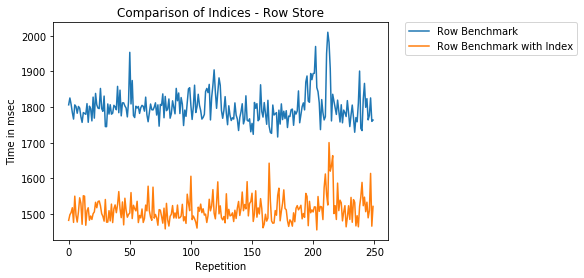

In [166]:
from util import Analyser
LOG_PATH_ROOT="./"
analyser = Analyser(LOG_PATH_ROOT + "logMain.log")

r_b = analyser.get_row_benchmark()
i_r_b = analyser.get_row_benchmark_I()
col_b = analyser.get_column_benchmark()
i_col_b = analyser.get_column_benchmark_I()
comparison = Comparison(r_b, i_r_b)

comparison.set_title("Comparison of Indices - Row Store")
comparison.compare_visually()

In [172]:
comparison.set_title("Comparison of Indices in msec - Row Store")
comparison.compare_raw()

q = r_b.get_query_stats(lambda x: not re.search("\\.", x))
q_i = i_r_b.get_query_stats(lambda x: not re.search("\\.", x))

q2 = r_b.get_query_stats(lambda x: re.search("2\\.", x))
q_i2 = i_r_b.get_query_stats(lambda x: re.search("2\\.", x))

q4 = r_b.get_query_stats(lambda x: re.search("4\\.", x))
q_i4 = i_r_b.get_query_stats(lambda x: re.search("4\\.", x))

compQ = Comparison(*q)
compQ.set_title("Queries without indizes")
compQi = Comparison(*q_i)
compQi.set_title("Queries with indizes")
                               
compQ2 = Comparison(*q2)
compQ2.set_title("Query 2 without indizes")
compQi2 = Comparison(*q_i2)
compQi2.set_title("Query 2 with indizes")
                               
compQ4 = Comparison(*q4)
compQ4.set_title("Query 4 without indizes")
compQi4 = Comparison(*q_i4)
compQi4.set_title("Query 4 with indizes")

compQ.compare_raw()
compQi.compare_raw()
                               
compQ2.compare_raw()
compQi2.compare_raw()
                               
compQ4.compare_raw()
compQi4.compare_raw()

||Row Benchmark|Row Benchmark with Index|
|--|--|--|
|Standard Deviation|44|36|
|Max|2010|1701|
|Total|450104|378304|
|Average|1800|1513|
|Median|1794|1508|
|Samples|250|250|
|Min|1716|1456|

Table: Comparison of Indices in msec - Row Store


|| q1| q2| q3| q4|
|--|--|--|--|--|
|Standard Deviation|16|18|19|14|
|Max|507|435|615|553|
|Total|105632|87928|129672|126873|
|Average|423|352|519|507|
|Median|421|350|517|506|
|Samples|250|250|250|250|
|Min|394|315|480|473|

Table: Queries without indizes


|| q1| q2| q3| q4|
|--|--|--|--|--|
|Standard Deviation|10|8|18|24|
|Max|206|126|561|899|
|Total|42414|22615|118288|194987|
|Average|170|90|473|780|
|Median|170|87|469|776|
|Samples|250|250|250|250|
|Min|149|82|435|740|

Table: Queries with indizes


|| q2.1| q2.2| q2.3|
|--|--|--|--|
|Standard Deviation|11|10|10|
|Max|168|143|133|
|Total|34644|27643|25475|
|Average|139|111|102|
|Median|138|110|101|
|Samples|250|250|250|
|Min|119|96|88|

Table: Query 2 without indizes


|| q2.1| q2.2| q2.3|
|--|--|--|--|
|Standard Deviation|8|4|1|
|Max|102|38|15|
|Total|18220|4015|888|
|Average|73|16|4|
|Median|69|15|3|
|Samples|250|250|250|
|Min|65|14|3|

Table: Query 2 with indizes


|| q4.1| q4.2| q4.3|
|--|--|--|--|
|Standard Deviation|9|10|9|
|Max|236|219|154|
|Total|50067|43774|31311|
|Average|200|175|125|
|Median|199|173|124|
|Samples|250|250|250|
|Min|181|155|109|

Table: Query 4 without indizes


|| q4.1| q4.2| q4.3|
|--|--|--|--|
|Standard Deviation|13|14|5|
|Max|468|371|70|
|Total|105261|80002|9617|
|Average|421|320|38|
|Median|419|319|37|
|Samples|250|250|250|
|Min|390|281|36|

Table: Query 4 with indizes


## compCol = Comparison(col_b, i_col_b)
compCol.set_title("Comparison of Indices - Column Store")
compCol.compare_visually()
compCol.compare_raw()

q = col_b.get_query_stats(lambda x: not re.search("\\.", x))
q_i = i_col_b.get_query_stats(lambda x: not re.search("\\.", x))

q2 = col_b.get_query_stats(lambda x: re.search("2\\.", x))
q_i2 = i_col_b.get_query_stats(lambda x: re.search("2\\.", x))

q4 = col_b.get_query_stats(lambda x: re.search("4\\.", x))
q_i4 = i_col_b.get_query_stats(lambda x: re.search("4\\.", x))
                               
                               
compQ = Comparison(*q)
compQ.set_title("Queries without indizes")
compQi = Comparison(*q_i)
compQi.set_title("Queries with indizes")
                               
compQ2 = Comparison(*q2)
compQ2.set_title("Query 2 without indizes")
compQi2 = Comparison(*q_i2)
compQi2.set_title("Query 2 with indizes")
                               
compQ4 = Comparison(*q4)
compQ4.set_title("Query 4 without indizes")
compQi4 = Comparison(*q_i4)
compQi4.set_title("Query 4 with indizes")

                               
                               
compQ.compare_raw()
compQi.compare_raw()
                               
compQ2.compare_raw()
compQi2.compare_raw()
                               
compQ4.compare_raw()
compQi4.compare_raw()

## Hardware Vergleich

### Einstellungen

In [ ]:
a6 = Analyser(LOG_PATH_ROOT + "12gb6cores.log")
a4 = Analyser(LOG_PATH_ROOT + "i7-4core.log")
a2 = Analyser(LOG_PATH_ROOT + "i7-2core.log")

aGb12 = Analyser(LOG_PATH_ROOT + "12gb6cores.log")
aGb8 = Analyser(LOG_PATH_ROOT + "8gb6cores.log")
aGb6 = Analyser(LOG_PATH_ROOT + "6gb6cores.log")

### Spaltenbasiert
#### CPU

In [ ]:
b6 = a6.get_column_benchmark()
b4 = a4.get_column_benchmark()
b2 = a2.get_column_benchmark()

b6.set_name("6 cores")
b4.set_name("4 cores")
b2.set_name("2 cores")

comparison = Comparison(b2, b4, b6)
comparison.set_title("Comparison of CPUs - Column Store")
comparison.compare_visually()

In [ ]:
comparison.set_title("Comparison of CPUs in usec - Column Store")
comparison.compare_raw()

In [ ]:
comparison.set_title("Normalized Comparison of CPUs - Column Store")
comparison.compare()

#### RAM

In [ ]:
b12 = aGb12.get_column_benchmark()
b8 = aGb8.get_column_benchmark()
b6 = aGb6.get_column_benchmark()

b12.set_name("12 Gb")
b8.set_name("8 Gb")
b6.set_name("6 Gb")

comparison = Comparison(b6, b8, b12)
comparison.set_title("Comparison of RAM - Column Store")
comparison.compare_visually()

In [ ]:
comparison.set_title("Comparison of RAM in usec - Column Store")
comparison.compare_raw()

In [ ]:
comparison.set_title("Normalized Comparison of RAM - Column Store")
comparison.compare()

### Zeilenbasiert
#### CPU

In [ ]:
b6 = a6.get_row_benchmark()
b4 = a4.get_row_benchmark()
b2 = a2.get_row_benchmark()

b6.set_name("6 cores")
b4.set_name("4 cores")
b2.set_name("2 cores")

comparison = Comparison(b2, b4, b6)
comparison.set_title("Comparison of CPUs - Row Store")
comparison.compare_visually()

In [ ]:
comparison.set_title("Comparison of CPUs in usec - Row Store")
comparison.compare_raw()

#### RAM

In [ ]:
b12 = aGb12.get_row_benchmark()
b8 = aGb8.get_row_benchmark()
b6 = aGb6.get_row_benchmark()

b12.set_name("12 Gb")
b8.set_name("8 Gb")
b6.set_name("6 Gb")

comparison = Comparison(b6, b8, b12)
comparison.set_title("Comparison of RAM - Row Store")
comparison.compare_visually()

In [ ]:
comparison.set_title("Comparison of RAM in usec - Row Store")
comparison.compare_raw()

In [ ]:
comparison.set_title("Normalized Comparison of RAM - Row Store")
comparison.compare()